In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer/data.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC



In [3]:
df=pd.read_csv('/kaggle/input/breast-cancer/data.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
#check the different values for diagnosis
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [8]:
#rename the column 'diagnosis' to 'malignant' and replace the M and B values by 1 and 0 respectively
df.rename(columns={'diagnosis':'malignant'},inplace=True)
df['malignant'].replace({'M':1,'B':0},inplace=True)

/tmp/ipykernel_18/3790784017.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['malignant'].replace({'M':1,'B':0},inplace=True)
/tmp/ipykernel_18/3790784017.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['malignant'].replace({'M':1,'B':0},inplace=True)


In [9]:
#drop the Id column
df.drop(['id'],axis=1,inplace=True)

Now let's do some plots

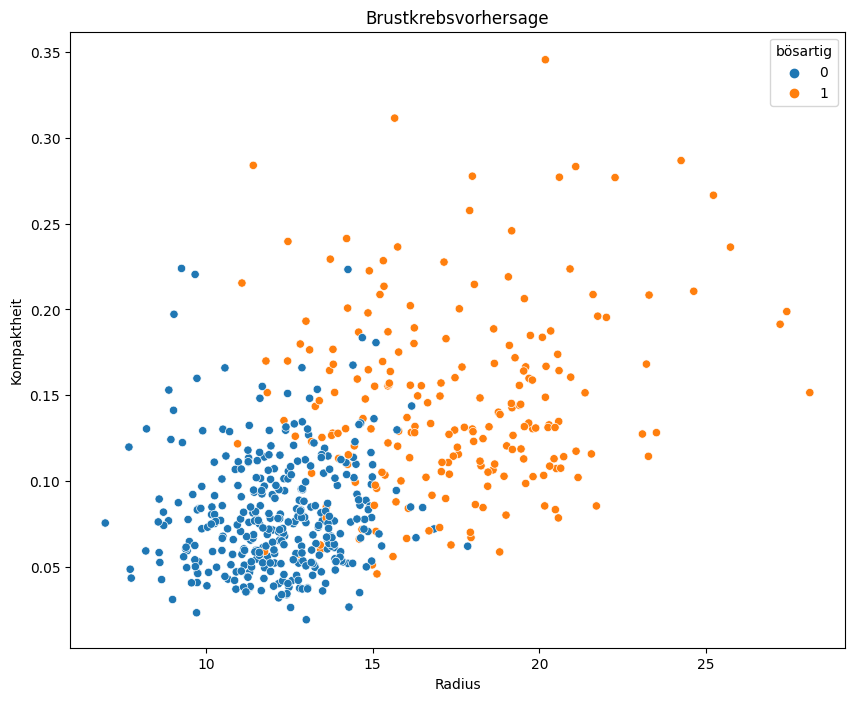

In [10]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x='radius_mean',y='compactness_mean',hue='malignant')
plt.xlabel('Radius')
plt.ylabel('Kompaktheit')
plt.title('Brustkrebsvorhersage')
plt.legend(title='bösartig')


In [11]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

Let's plot some histplots to get a first idea of which features mostly impact our target value 'malignant'

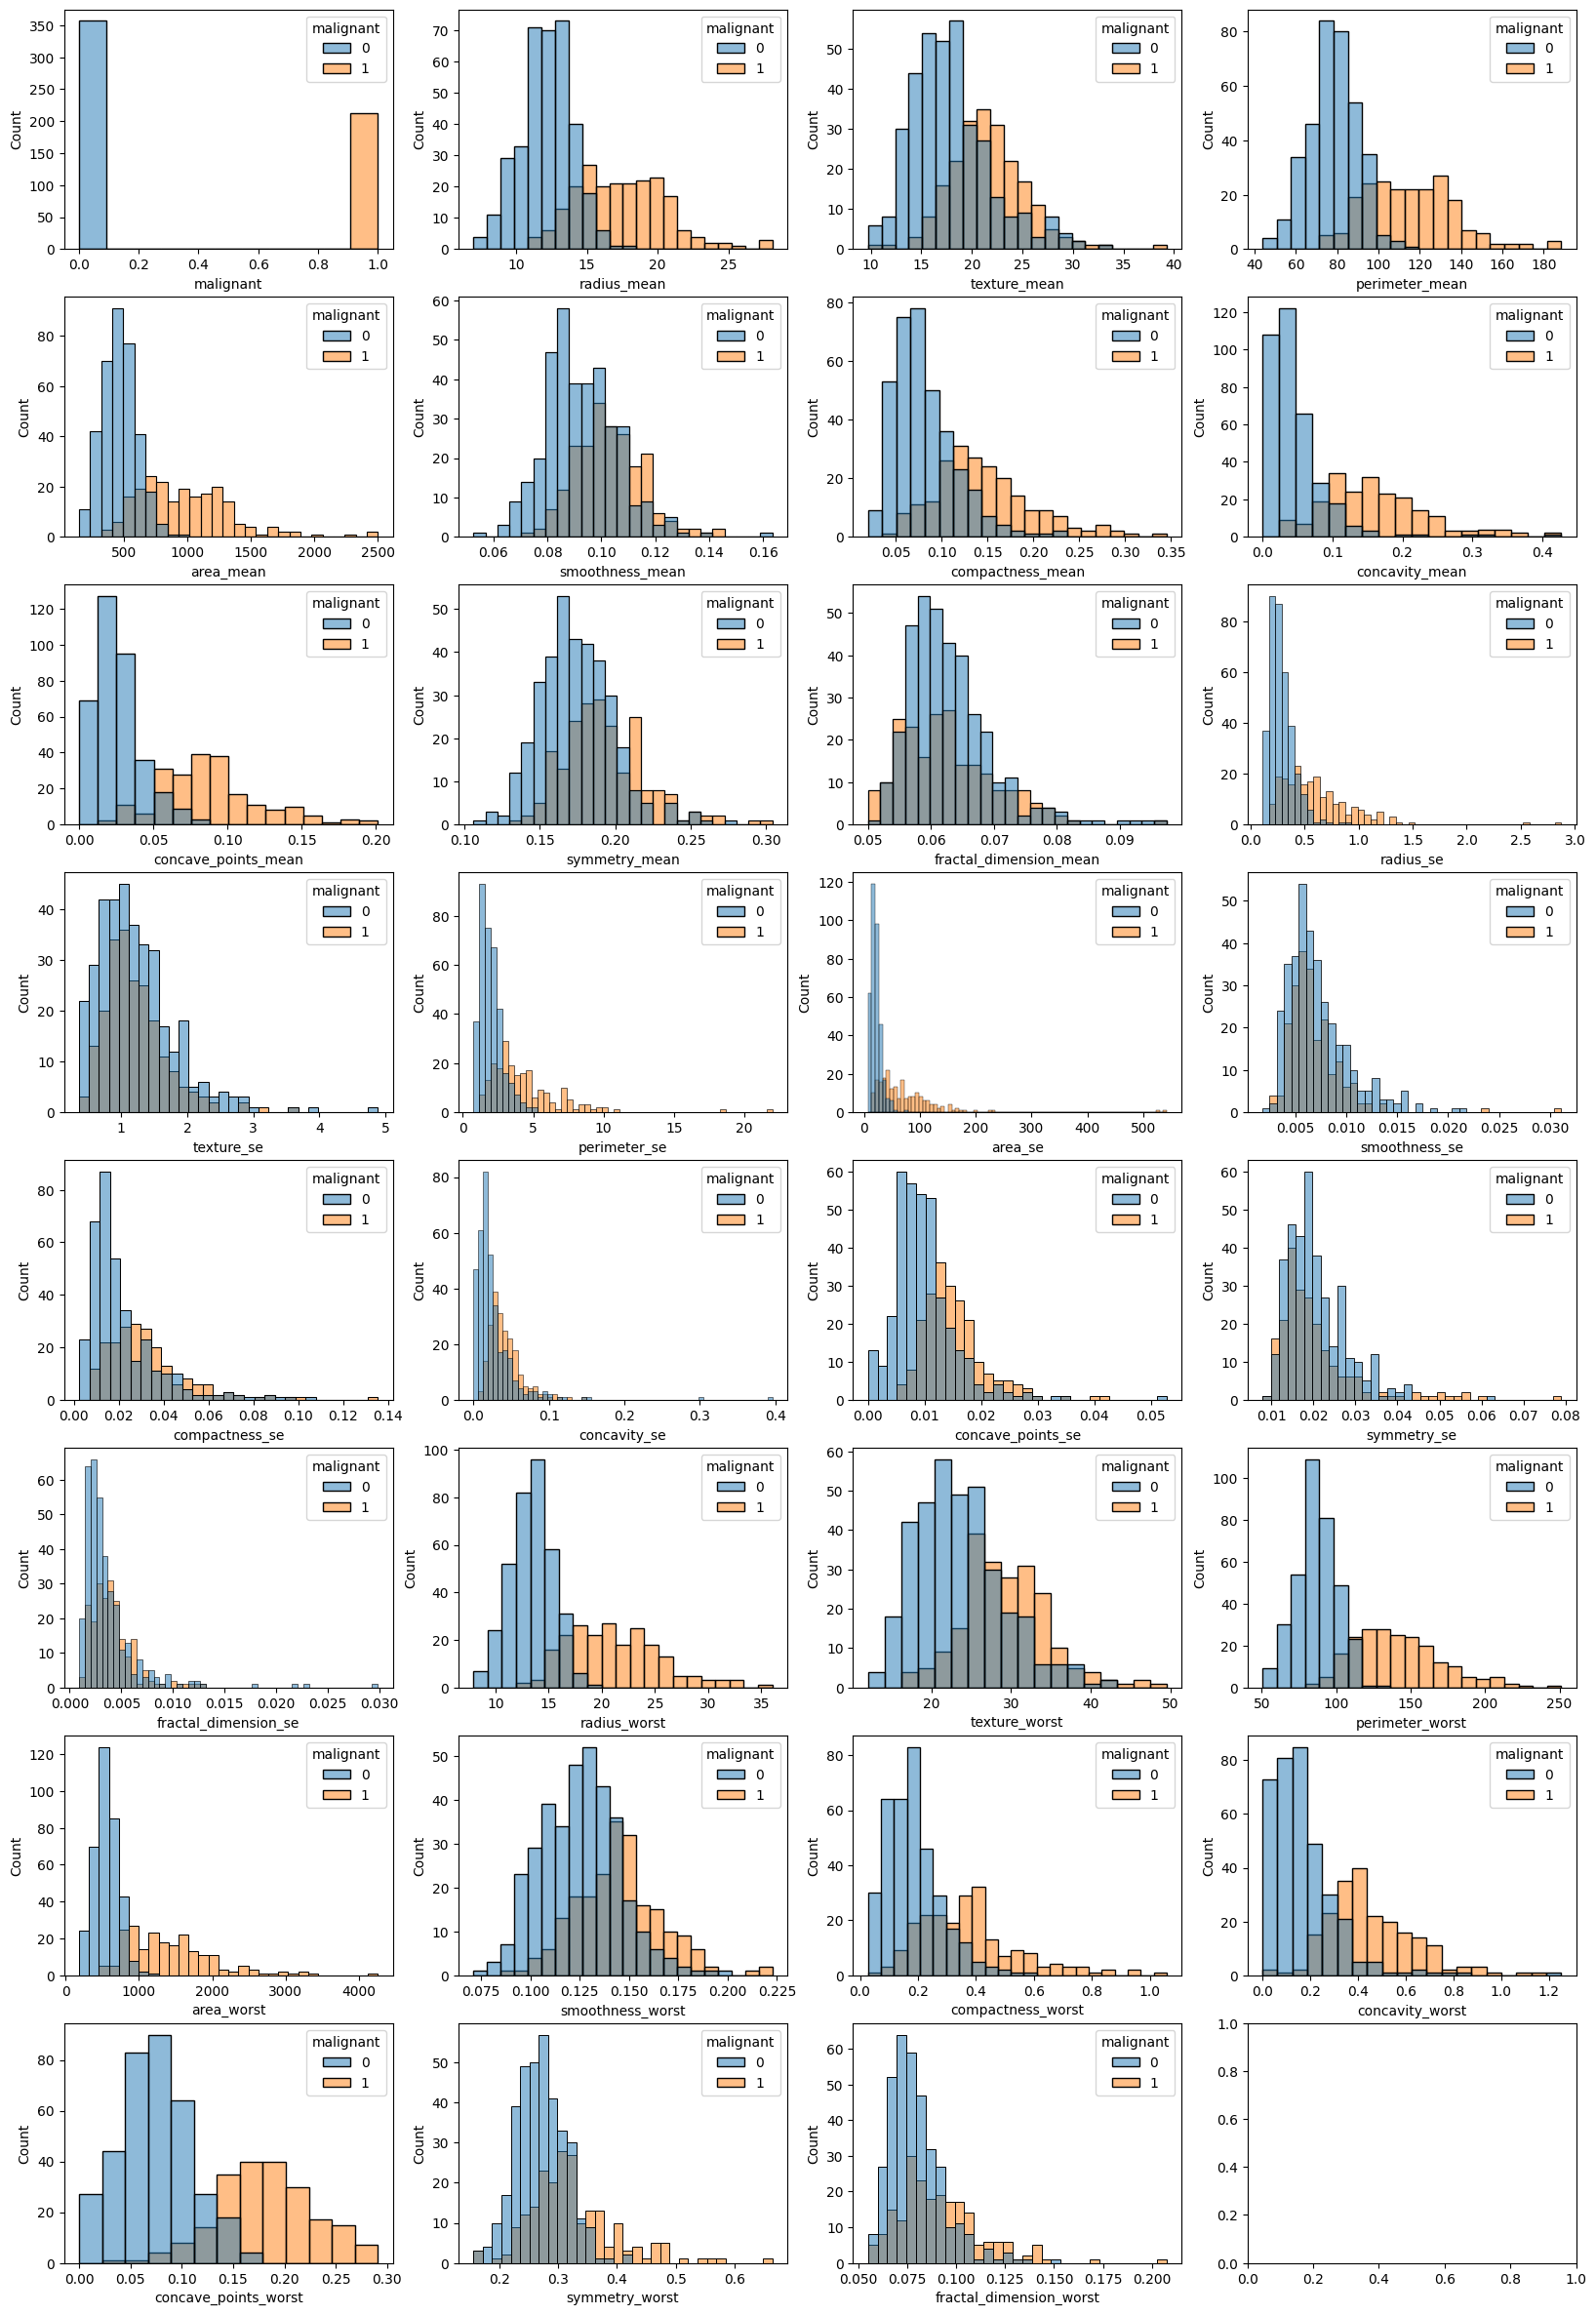

In [12]:
fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(20,30))
axs=axs.flat
for i in range(len(df.columns)):
    sns.histplot(data=df,x=df.columns[i],ax=axs[i],hue='malignant')
plt.show()

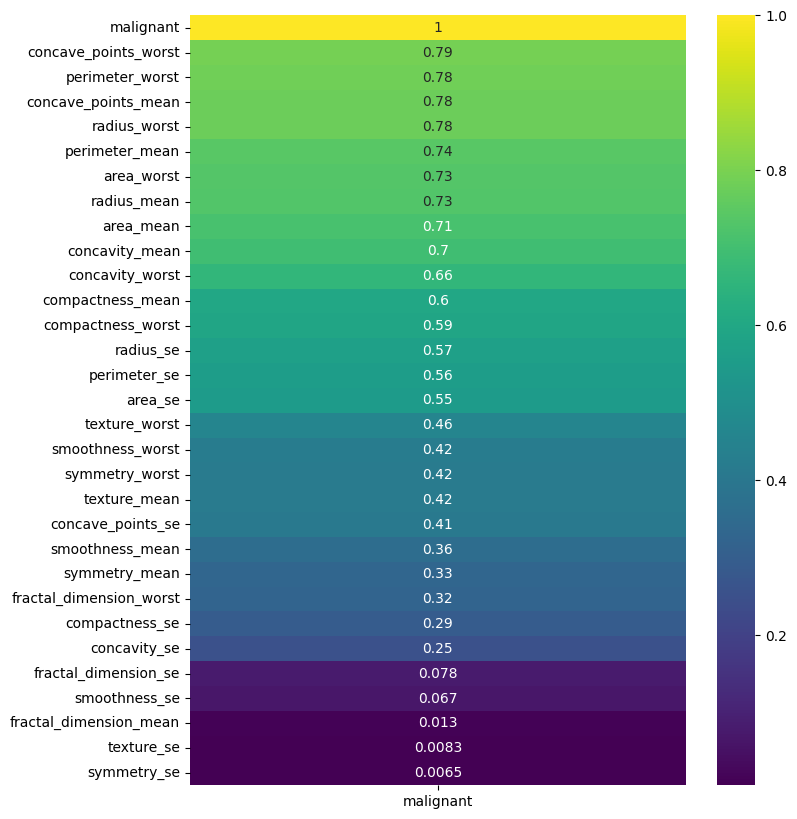

In [13]:
#Now, let's take a look at the correlation of each feature with the target value
corr=df.corr()['malignant']
corr=corr.abs().sort_values(ascending=False)
plt.figure(figsize=(8,10))
sns.heatmap(corr.to_frame(),annot=True, cmap='viridis')
plt.show()

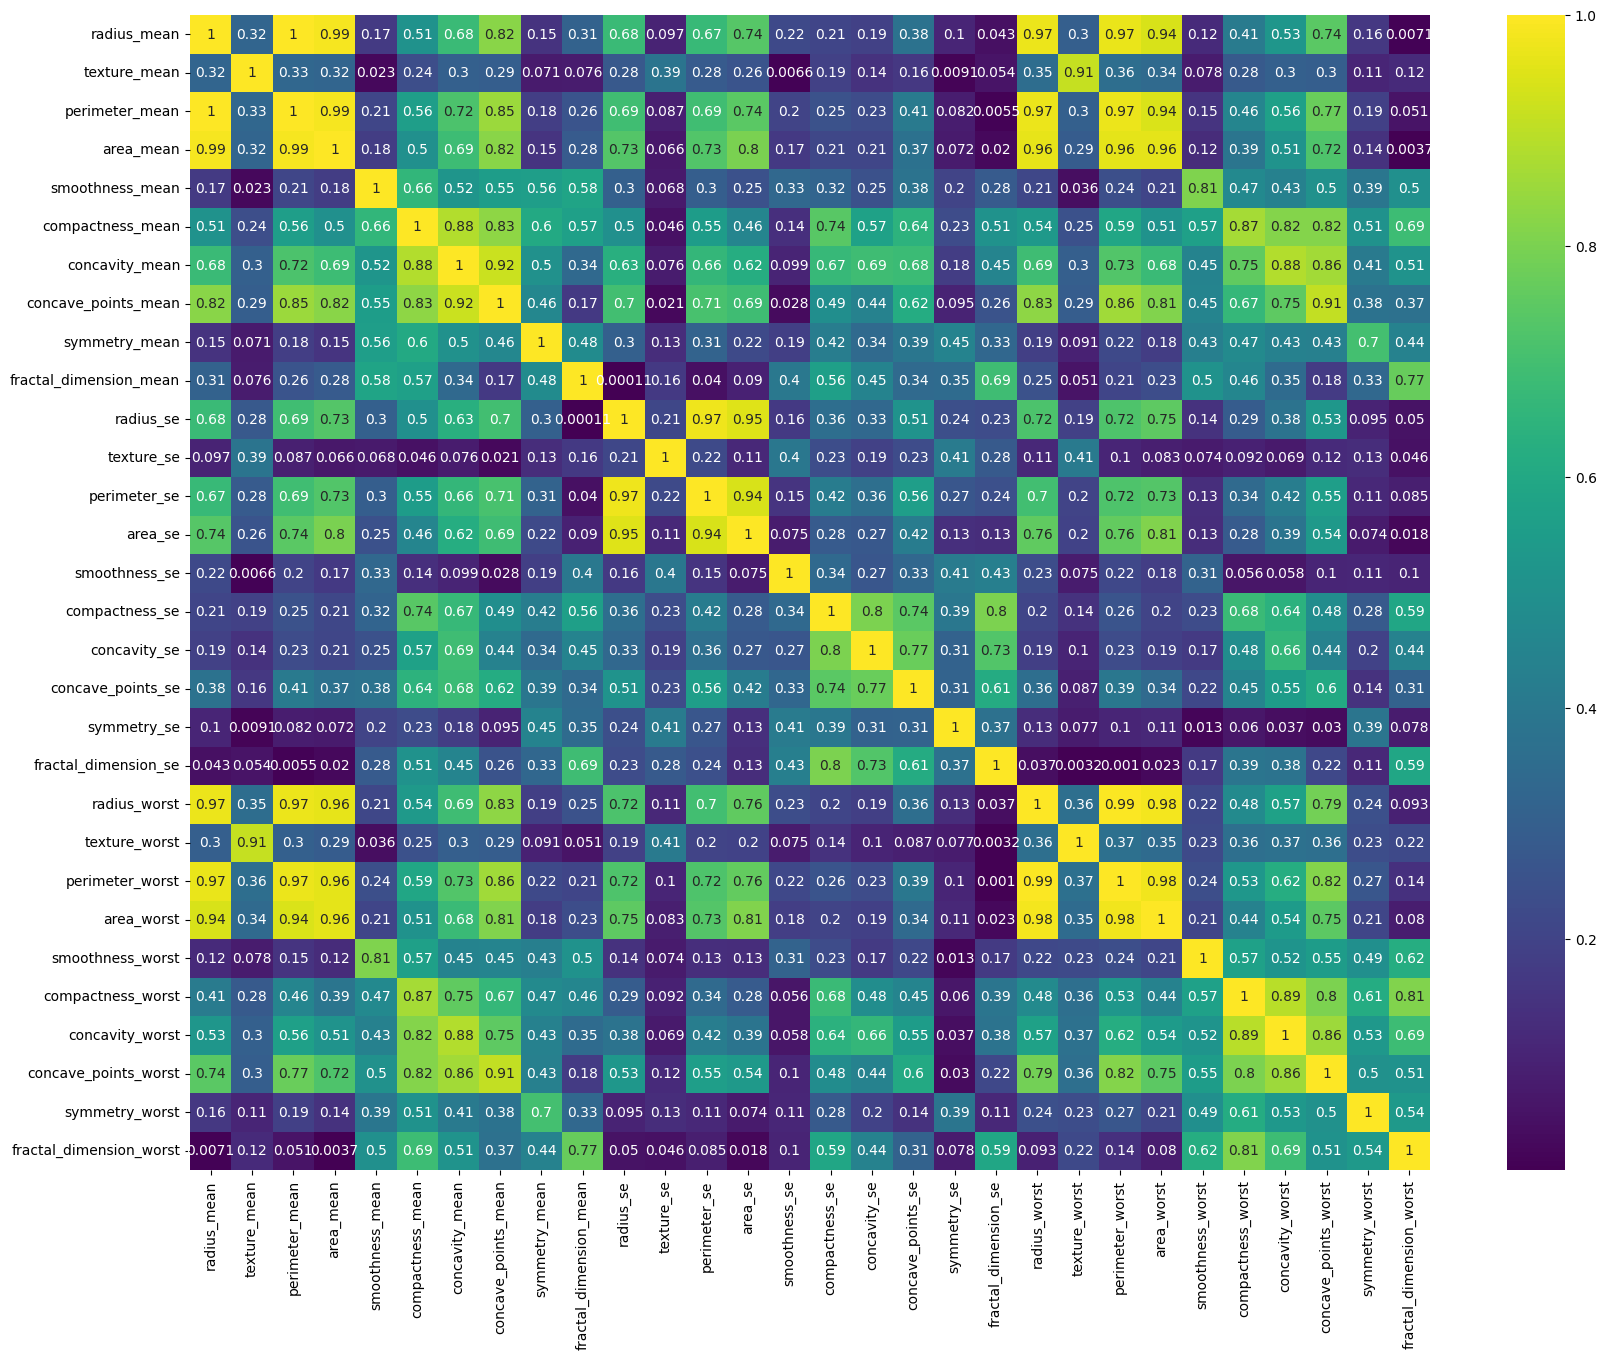

In [14]:
#Now, let's see how each 
corr_all=df.drop(columns=['malignant']).corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(corr_all,annot=True, cmap='viridis')
plt.show()

The heatmap shows some huge correlations between several features. E.g. 'radius mean' and 'area mean' or 'radius worst' are highly correlated (0.99 or 0.97). In order to avoid overfitting it is important to remove features that are highly correlated. In the 'corr' table I sorted all features by importance towards the target value. This table will define my hierarchie and I ll remove all features that are highly correlated with another feature (>0.8) but with a lower hierarchie. 

In [15]:
#selected_features collects only those, that are not highly correlated with another feature
selected_features=set()
for i in range(len(corr)-1):
    if len(selected_features)==0:
        selected_features.add(corr.index[i+1])
    elif df[list(selected_features)].corrwith(df[corr.index[i+1]]).abs().max()<0.8: #check if the feature i+1 is highly correlated with one of the already 'selected features'
        selected_features.add(corr.index[i+1])
selected_features.add('malignant')        
    

In [16]:
selected_features

{'compactness_se',
 'concave_points_se',
 'concave_points_worst',
 'fractal_dimension_mean',
 'fractal_dimension_worst',
 'malignant',
 'radius_se',
 'radius_worst',
 'smoothness_se',
 'smoothness_worst',
 'symmetry_mean',
 'symmetry_se',
 'symmetry_worst',
 'texture_se',
 'texture_worst'}

In [17]:
#Define a new dataframe only containing the selected_features and the target value
df_new=df[list(selected_features)]

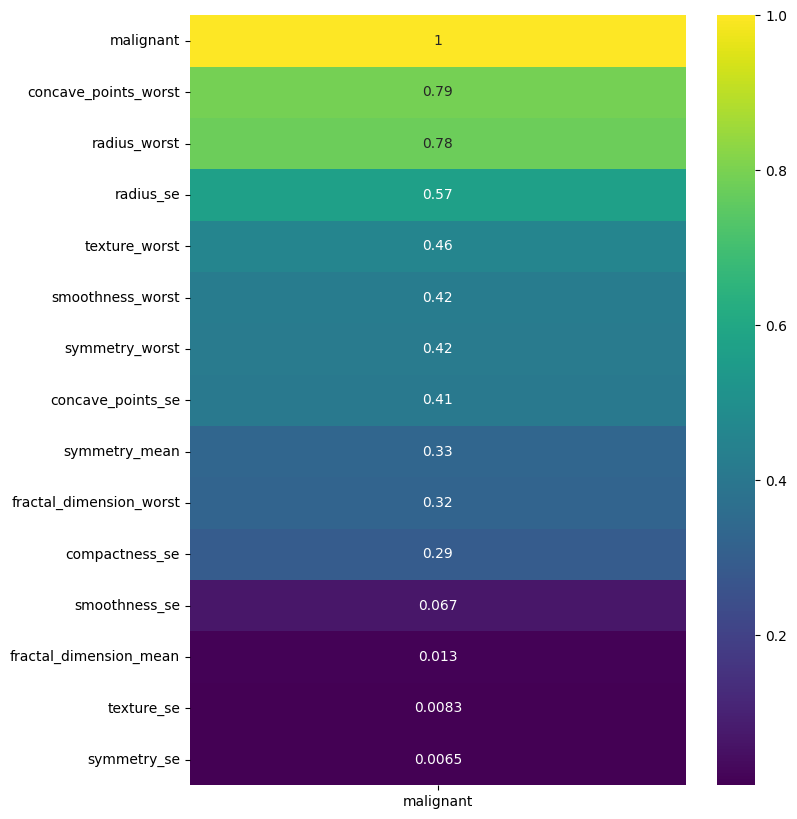

In [18]:
corr2=df_new.corr()['malignant']
corr2=corr2.abs().sort_values(ascending=False)
plt.figure(figsize=(8,10))
sns.heatmap(corr2.to_frame(),annot=True, cmap='viridis')
plt.show()

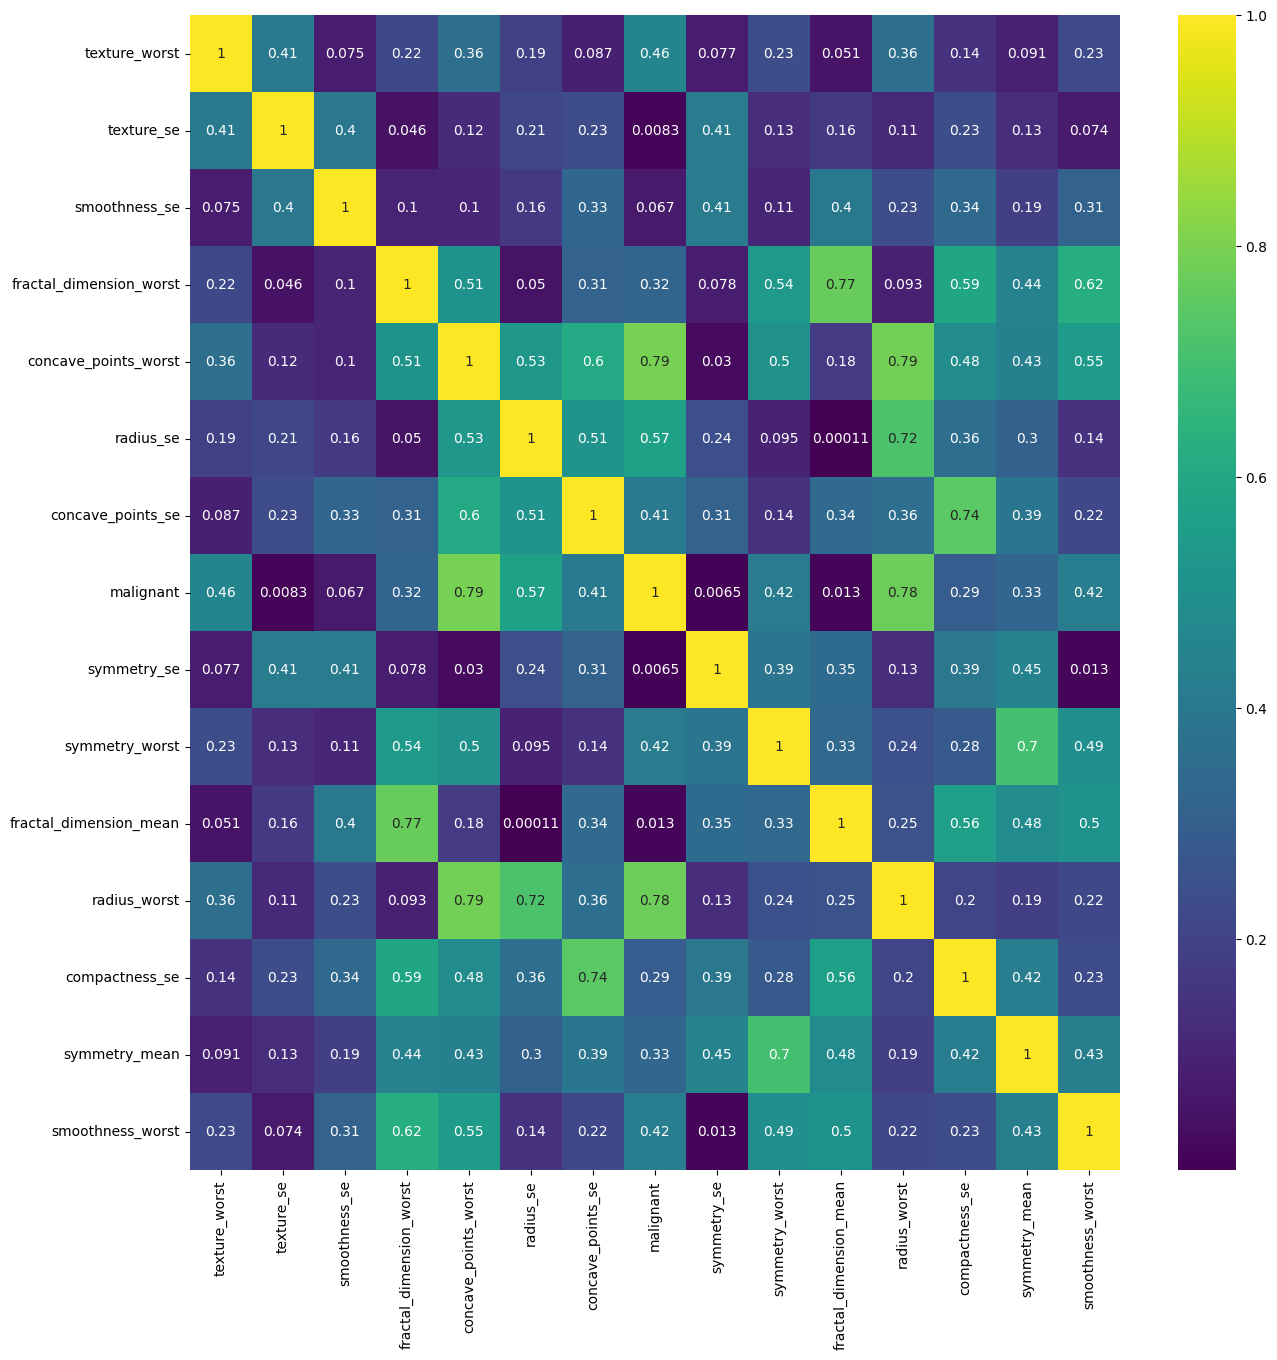

In [19]:
corr3=df_new.corr().abs()
plt.figure(figsize=(15,15))
sns.heatmap(corr3,annot=True, cmap='viridis', )
plt.show()

Now, our list of features is significantly smaller. Let's build our models now

In [20]:
X=df_new.drop('malignant',axis=1).to_numpy()
y=df_new['malignant'].to_numpy()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

Let's build a Pipeline using Logistic regression, SVC, Random Forest Gradient Boosting and KNN as different classifiers

In [22]:
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegressionCV(),
    'Support Vector Classifier': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-nearest neighbours': KNeighborsClassifier(),
    'XGB' : xgb.XGBClassifier()
}
best_accuracy = 0
best_classifier = None

In [23]:
for name, classifier in classifiers.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])
    pipeline.fit(X_train,y_train)
    accuracy = pipeline.score(X_test,y_test)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier = name

In [24]:
print("Best Classifier:", best_classifier)
print("Best Accuracy:", best_accuracy)

Best Classifier: Logistic Regression
Best Accuracy: 0.9649122807017544


In [25]:
#Final Model
model=LogisticRegressionCV(random_state=42)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

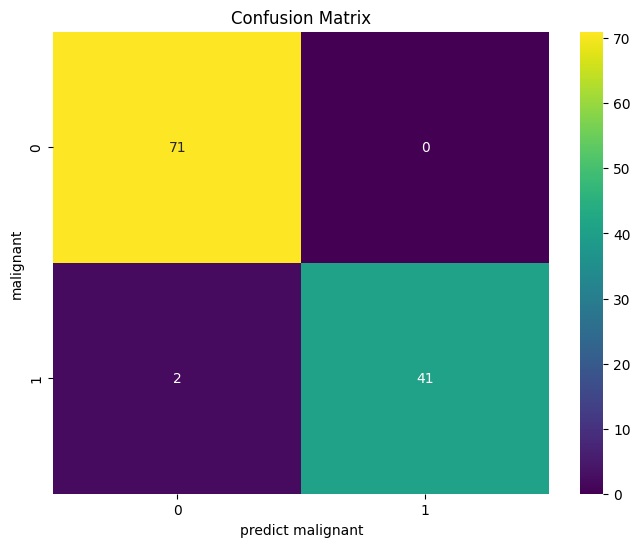

In [26]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

# Set labels and title
plt.xlabel('predict malignant')
plt.ylabel('malignant')
plt.title('Confusion Matrix')

In [27]:
accuracy_score(y_test,y_predict)

0.9824561403508771